# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import zipfile 
import re
import geopandas as gpd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### uncheck below to download and move data

In [13]:
#!bash -e download.txt

--2017-12-11 11:37:56--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp94totals.zip
Resolving www2.census.gov (www2.census.gov)... 23.208.100.196, 2600:1400:a:299::208c, 2600:1400:a:28c::208c
Connecting to www2.census.gov (www2.census.gov)|23.208.100.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611524 (597K) [application/zip]
Saving to: ‘zbp94totals.zip’

zbp94totals.zip     100%[===================>] 597.19K  --.-KB/s    in 0.08s   

2017-12-11 11:37:56 (7.71 MB/s) - ‘zbp94totals.zip’ saved [611524/611524]

--2017-12-11 11:37:56--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp95totals.zip
Resolving www2.census.gov (www2.census.gov)... 23.208.100.196, 2600:1400:a:299::208c, 2600:1400:a:28c::208c
Connecting to www2.census.gov (www2.census.gov)|23.208.100.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625328 (611K) [application/zip]
Saving to: ‘zbp95totals.zip’

zbp95totals.zip     100%[===============

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


In [14]:
#!wget 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'

--2017-12-11 11:40:14--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2017-12-11 11:40:14--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: 1514401 (1.4M) [application/octet-stream]
Saving to: ‘application%2Fzip’

application%2Fzip   100%[===================>]   1.44M  2.10MB/s    in 0.7s    

2017-12-11 11:40:15 (2.10 MB/s) - ‘application%2Fzip’ saved [1514401/1514401]



In [19]:
# for item in os.listdir():
#     if item.endswith('.zip'):
#         os.system('mv ' + item + ' ' + os.getenv('PUIDATA') + '/' + item)

In [22]:
# os.system("unzip application%2Fzip -d " + os.getenv("PUIDATA") + '/zip_code_shape')
# !rm application%2Fzip

## You can use zipfile module in python to unzip the files
it should be install in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands, and miss the chance to learn something new)

In [135]:
df = pd.DataFrame()
for item in os.listdir(os.getenv('PUIDATA')):
    if item.endswith('.zip'):
        time = int(re.findall('\d+', item)[0])
        if time > 50:
            time = time + 1900
        else: 
            time = time + 2000
        zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + item)
        df1 = pd.read_csv(zf.open(item.replace('.zip','.txt'))).assign(year = time)
        df1.rename(columns=str.lower, inplace = 1)
        df = pd.concat([df, df1[['zip', 'est', 'year']]])

In [136]:
df.head()

,zip,est,year
0,1001,439,1994
1,1002,450,1994
2,1003,10,1994
3,1004,47,1994
4,1005,92,1994


In [137]:
df.shape

(828791, 3)

In [138]:
len(pd.unique(df.zip))

42671

In [139]:
data = pd.pivot_table(df, values='est', index=['zip'], columns = ['year'])

In [140]:
data = data.dropna(axis = 0) 

In [141]:
data.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,505.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,586.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,16.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0
1004,47.0,48.0,47.0,41.0,31.0,35.0,48.0,37.0,23.0,21.0,...,31.0,30.0,20.0,18.0,18.0,21.0,19.0,16.0,16.0,13.0
1005,92.0,95.0,101.0,104.0,95.0,82.0,86.0,90.0,94.0,93.0,...,94.0,98.0,106.0,97.0,87.0,96.0,91.0,94.0,97.0,97.0


In [142]:
#merge with NYC zipcodes
nyc_zip = gpd.GeoDataFrame.from_file(os.path.join(os.getenv('PUIDATA')
                                                  + "/zip_code_shape", 
                                                  'ZIP_CODE_040114.shp'))

In [143]:
nyc_zip.ZIPCODE = nyc_zip.ZIPCODE.astype(int)
nyc_zip.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [144]:
# data = data.iloc[np.unique(nyc_zip.ZIPCODE), :]
data['zip'] = data.index.astype(int)

In [145]:
data = nyc_zip[['ZIPCODE','geometry']].merge(data, left_on = 'ZIPCODE', right_on = 'zip', how = 'left')

In [146]:
data = data.dropna(axis = 0)

In [147]:
data = data.drop([ 'ZIPCODE'], axis = 1)

In [148]:
data.index = data.zip

In [149]:
for i in range(data.shape[0]):
    miu = np.mean(data.iloc[i, 1:22])
    sd = np.std(data.iloc[i, 1:22])
    data.iloc[i, 1:22] = list(map(lambda x: (x-miu)/sd, data.iloc[i, 1:22]))

In [150]:
data.head()

,geometry,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,zip
zip,,,,,,,,,,,,,,,,,,,,,
11436.0,"POLYGON ((1038098.251871482 188138.3800067157,...",-1.328089,-1.380613,-1.223043,-1.328089,-1.328089,-0.960426,-0.592763,-1.012950,0.090040,...,0.195087,0.405180,0.720320,0.825366,1.140506,1.298076,0.982936,1.193030,1.718263,11436.0
11213.0,"POLYGON ((1001613.712964058 186926.4395172149,...",-1.469190,-1.337700,-1.215603,-0.999586,-0.811744,-0.839920,-0.802352,-0.652079,-0.154298,...,0.024151,-0.060378,0.277737,0.550107,1.057280,1.047888,1.536276,1.808646,1.968311,11213.0
11212.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",-1.104595,-1.240103,-1.141551,-0.833579,-0.932130,-0.661114,-0.919811,-0.833579,-0.217634,...,-0.303866,-0.094445,0.090339,0.644689,1.285272,1.457737,1.556288,1.679477,1.938174,11212.0
11225.0,"POLYGON ((995908.3654508889 183617.6128015518,...",-1.253491,-1.188335,-1.177475,-0.938567,-0.873410,-0.949427,-0.862551,-0.808254,-0.189265,...,0.027924,0.190816,0.255973,0.505740,0.907540,1.092151,1.374497,1.917469,2.167237,11225.0
11218.0,"POLYGON ((991997.1134308875 176307.4958601296,...",-1.511359,-1.370005,-1.209805,-1.087299,-0.884692,-0.738627,-0.682086,-0.592562,-0.366397,...,0.118916,0.335658,0.429894,0.712600,0.792700,1.023578,1.409943,1.796309,2.027186,11218.0


In [151]:
data.shape

(243, 23)

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: we talked about the importance of "whitening" your data.
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

In [182]:
vals_ = data.iloc[:, 1:22] 
KM = KMeans(n_clusters = 6, random_state = 123).fit(vals_)

In [184]:
data['KM7'] = KM.labels_

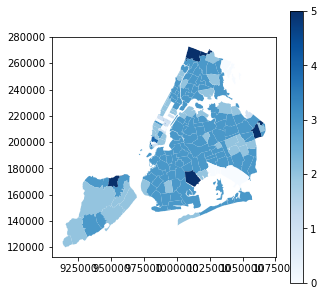

In [185]:
data.plot(column = 'KM7', cmap="Blues", figsize = (5,5), legend = True);

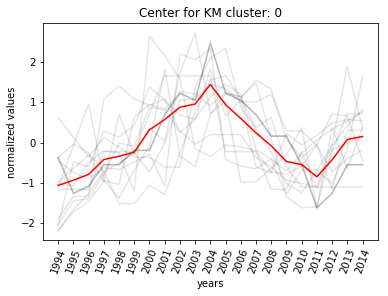

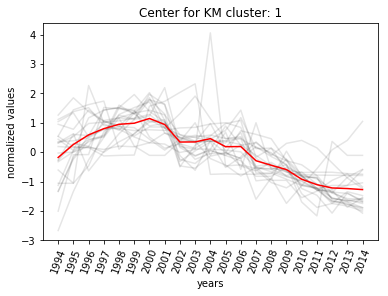

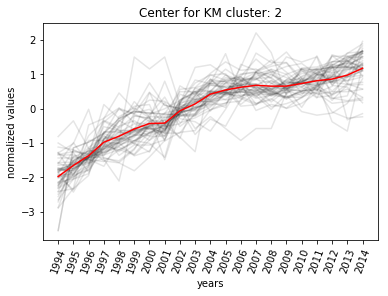

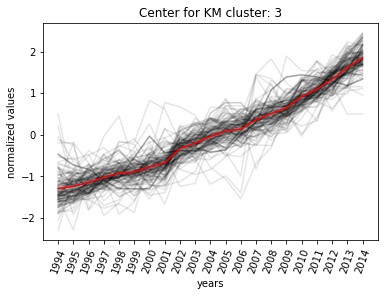

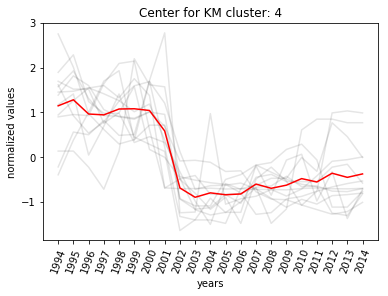

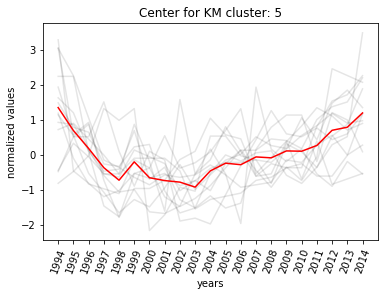

In [211]:
for i in range(6):
    plt.figure()
    df = data[data.KM7 == i]
    for j in range(df.shape[0]):
        plt.plot(list(range(21)), df.iloc[j, 1:22], c = 'k', alpha = 0.1)
    plt.plot(list(range(21)), KM.cluster_centers_[i], c = 'red')
    plt.xticks(list(range(21)), range(1994,2015),rotation = 70)
    plt.xlabel('years')
    plt.ylabel('normalized values')
    plt.title('Center for KM cluster: ' + str(i))
    plt.show()

In [192]:
n=6 # number of clusters.

GM = GaussianMixture(n_components=n, random_state = 123)
GM.fit(vals_)
res_Mix=GM.predict(vals_)
data['GM7'] = res_Mix

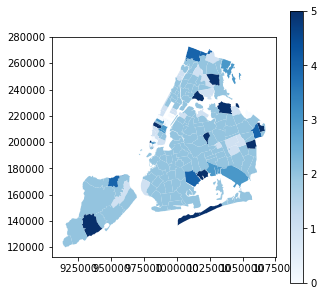

In [164]:
data.plot(column = 'GM7', cmap="Blues", figsize = (5,5), legend = True);

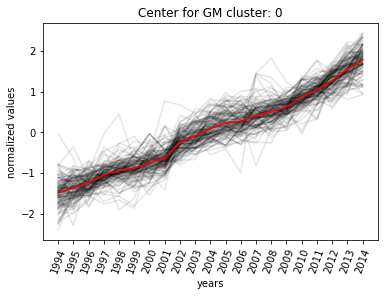

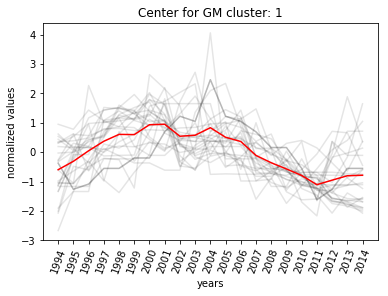

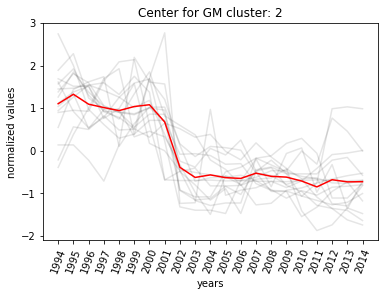

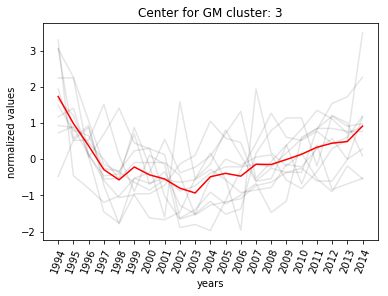

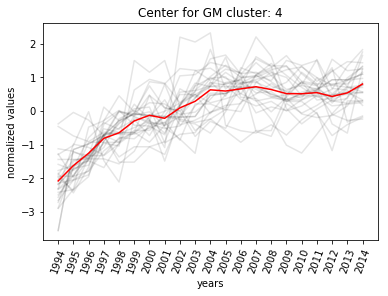

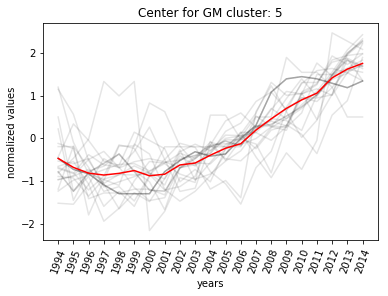

In [212]:
for i in range(6):
    plt.figure()
    df = data[data.GM7 == i]
    for j in range(df.shape[0]):
        plt.plot(list(range(21)), df.iloc[j, 1:22], c = 'k', alpha = 0.1) 
    plt.plot(list(range(21)), list(df.iloc[:, 1:22].mean(axis = 0)), c = 'red')
    plt.xticks(list(range(21)), range(1994,2015),rotation = 70)
    plt.xlabel('years')
    plt.ylabel('normalized values')
    plt.title('Center for GM cluster: ' + str(i))
    plt.show()

Interpretation: both clusterinf techniques gave us pretty similar results. we see very strong clustering results from 

### The map of the clusters may look something like this

//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


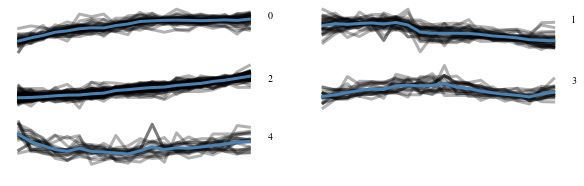

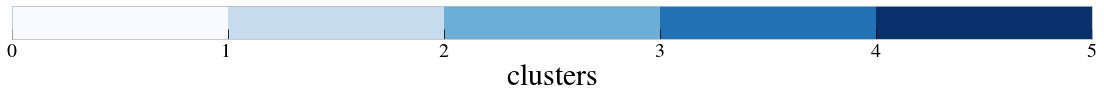

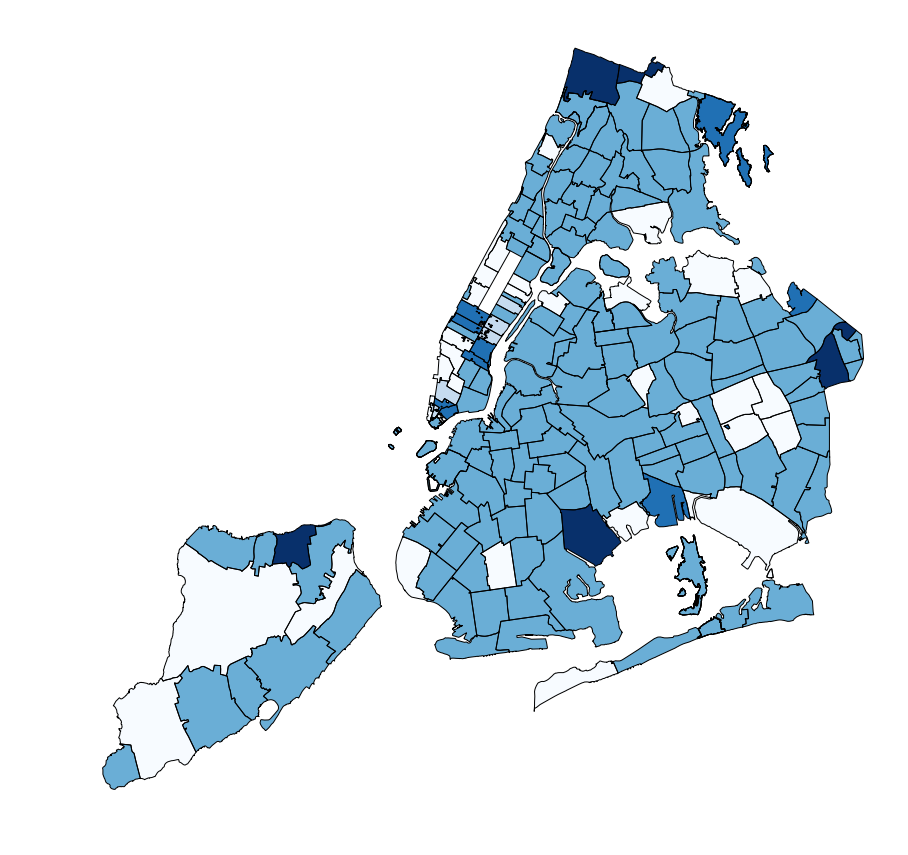

In [16]:
...

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

(905410.75604293647,
 1075212.5382562787,
 112386.35181947277,
 280345.45402395504)

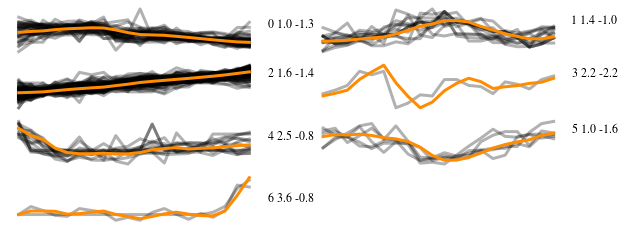

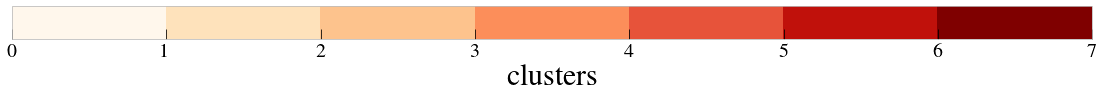

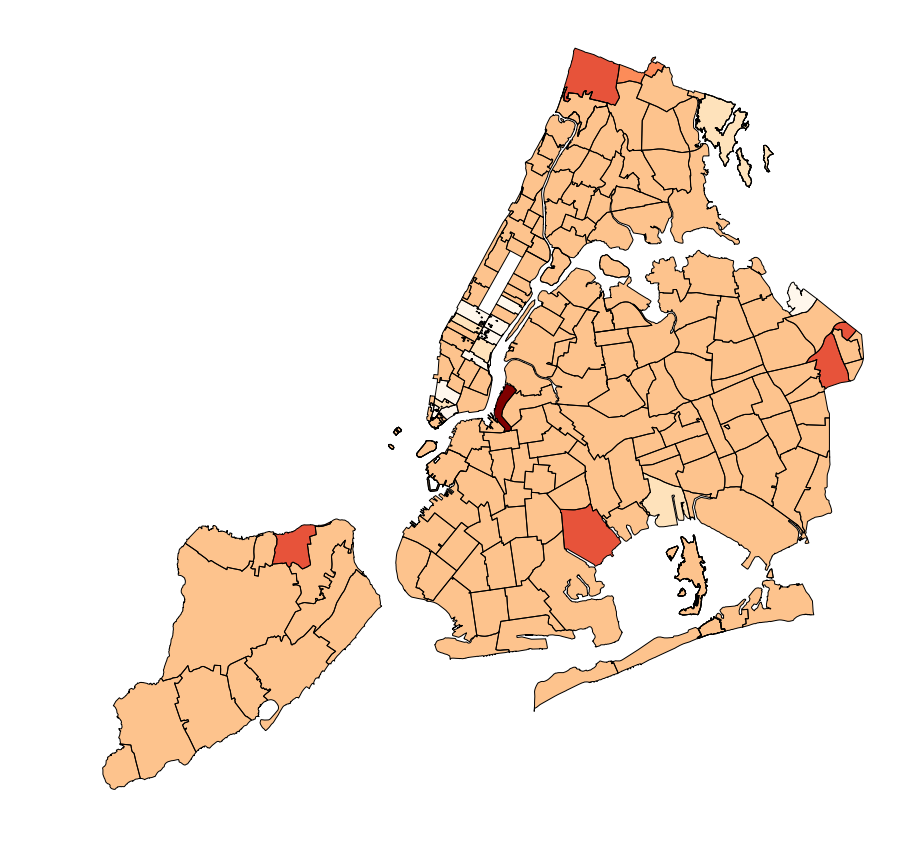

In [29]:
...

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

### And if you use hierarchical clustering and make a dandrogram it may look like this:

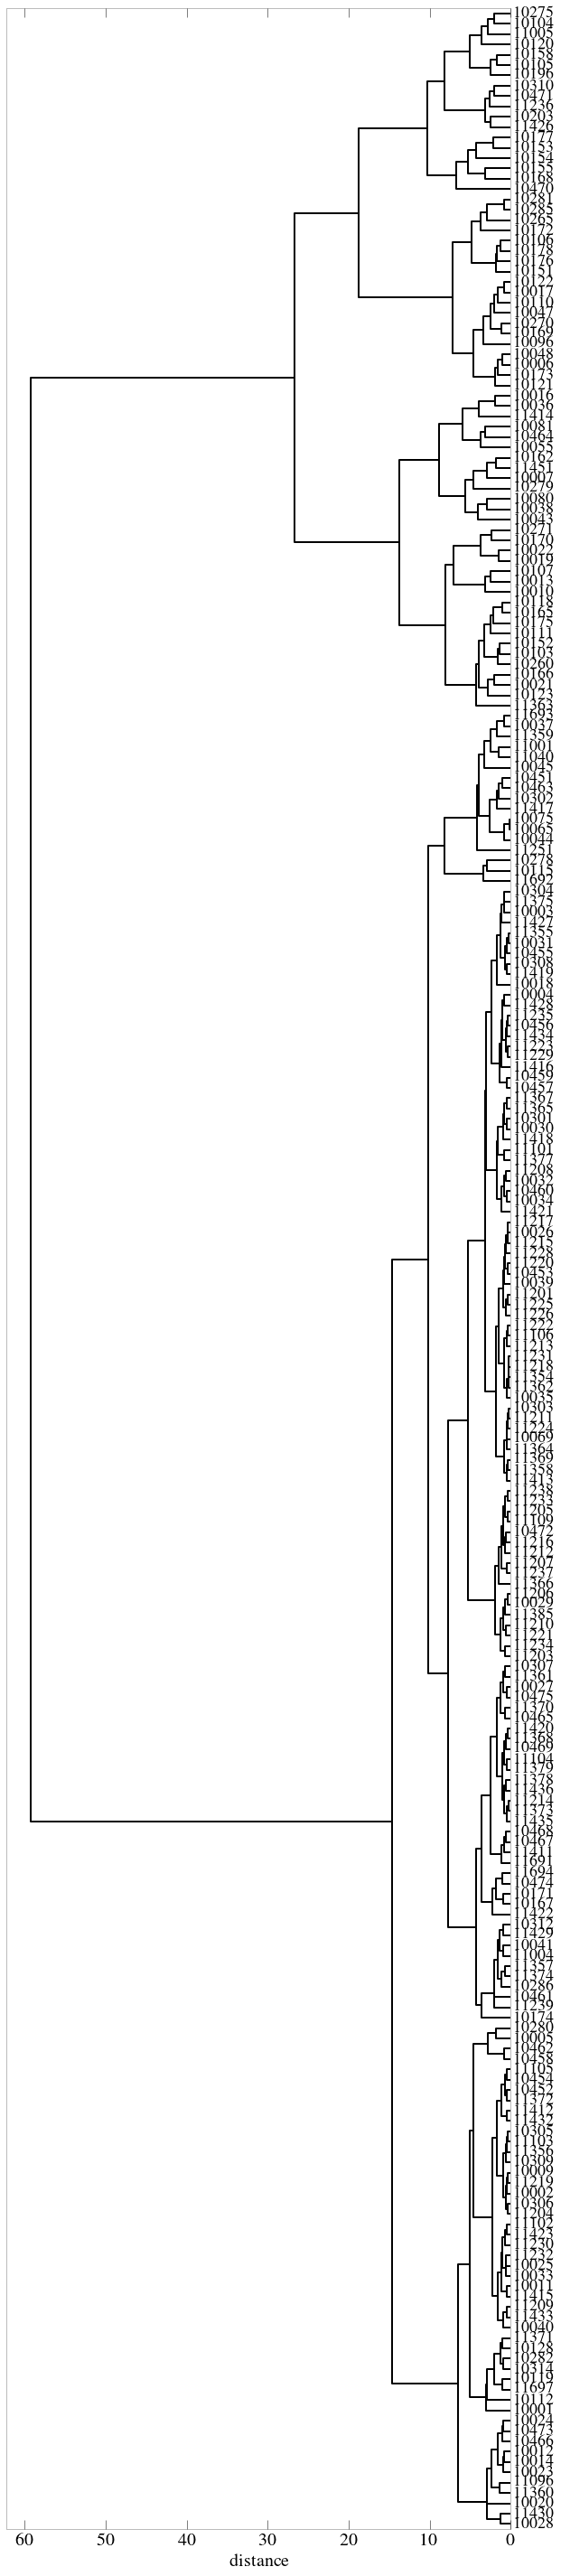

In [1]:
from PIL import Image
Image.open("dandrogram.png")